#### Import of Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [66]:
df = pd.read_csv('datasets/Qualitative_Bankruptcy/Qualitative_Bankruptcy_data.csv')
df=df.replace("P",2) #Positive
df=df.replace("A",1) #Average
df=df.replace("N",0) #Negative

In [67]:
df.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitivenes,Operating Risk,Class
0,2,2,1,1,1,2,NB
1,0,0,1,1,1,0,NB
2,1,1,1,1,1,1,NB
3,2,2,2,2,2,2,NB
4,0,0,2,2,2,0,NB


In [68]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    int64 
 1   Management Risk        250 non-null    int64 
 2   Financial Flexibility  250 non-null    int64 
 3   Credibility            250 non-null    int64 
 4   Competitivenes         250 non-null    int64 
 5   Operating Risk         250 non-null    int64 
 6   Class                  250 non-null    object
dtypes: int64(6), object(1)
memory usage: 13.8+ KB
Number of duplicated rows is:  147
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

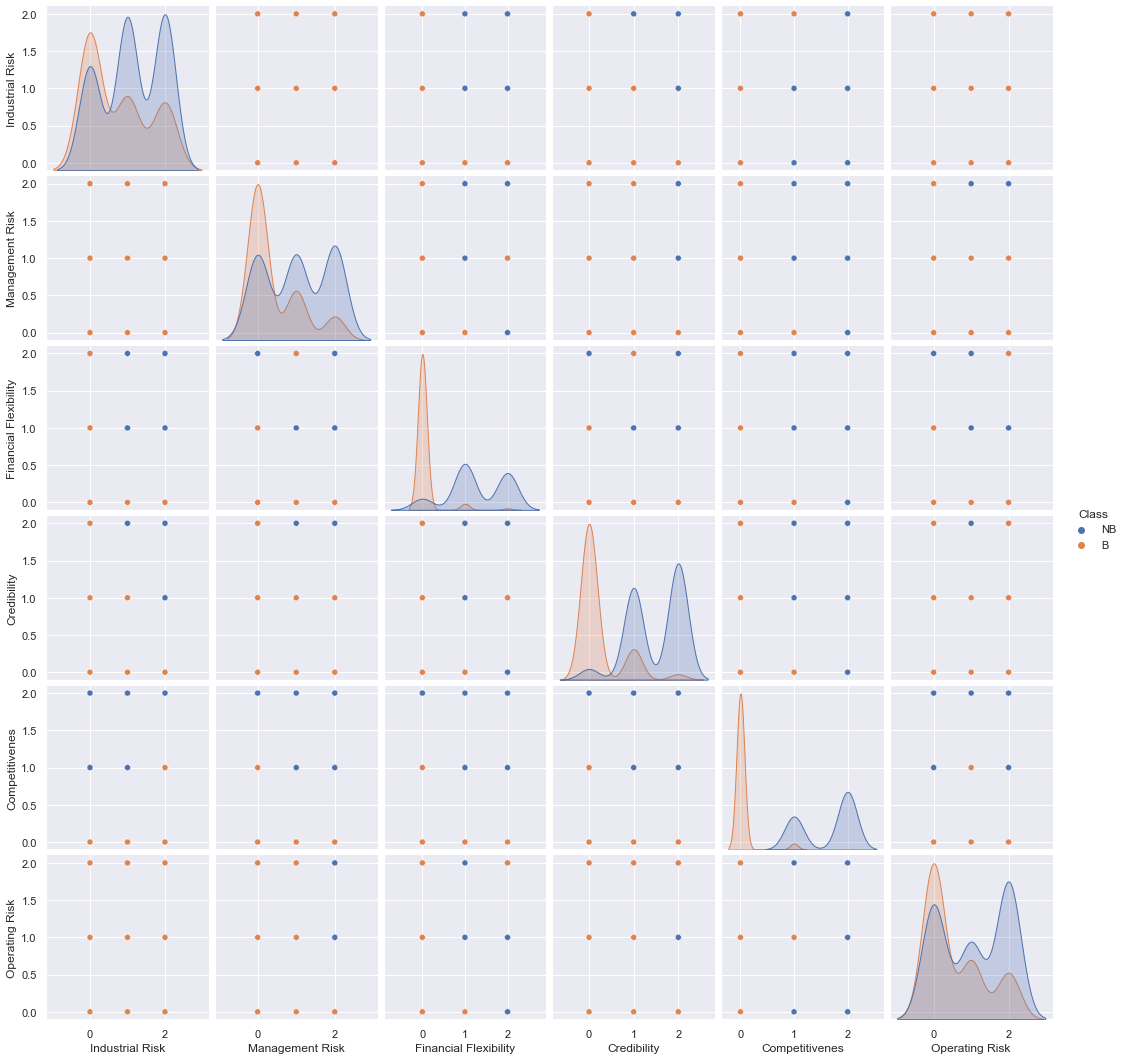

In [69]:
sns.pairplot(df, hue='Class')
plt.show()

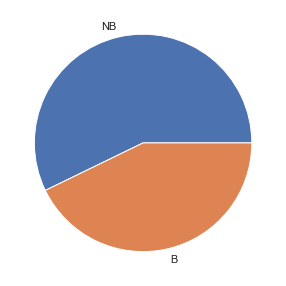

In [70]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [71]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,0.964,0.823051,0.0,0.0,1.0,2.0,2.0
Management Risk,250.0,0.772,0.821410,0.0,0.0,1.0,1.0,2.0
Financial Flexibility,250.0,0.752,0.803166,0.0,0.0,1.0,1.0,2.0
Credibility,250.0,0.940,0.831363,0.0,0.0,1.0,2.0,2.0
Competitivenes,250.0,0.952,0.881364,0.0,0.0,1.0,2.0,2.0
Operating Risk,250.0,0.860,0.869150,0.0,0.0,1.0,2.0,2.0


#### Standardize the Data

In [72]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,5.684342e-17,1.002006,-1.173601,-1.173601,0.043827,1.261256,1.261256
Management Risk,250.0,-2.842171e-17,1.002006,-0.941732,-0.941732,0.278128,0.278128,1.497989
Financial Flexibility,250.0,5.684342e-17,1.002006,-0.938172,-0.938172,0.309397,0.309397,1.556967
Credibility,250.0,5.684342e-17,1.002006,-1.132941,-1.132941,0.072315,1.277572,1.277572
Competitivenes,250.0,0.000000e+00,1.002006,-1.082310,-1.082310,0.054570,1.191451,1.191451
Operating Risk,250.0,-2.842171e-17,1.002006,-0.991457,-0.991457,0.161400,1.314257,1.314257


#### Observations and Variables

In [73]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

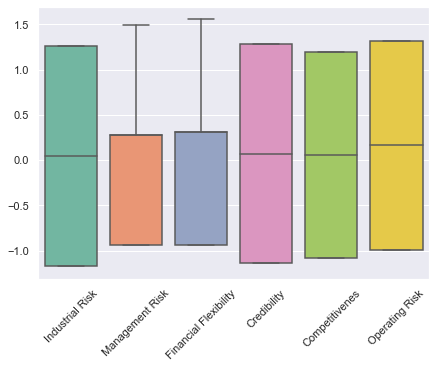

In [74]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

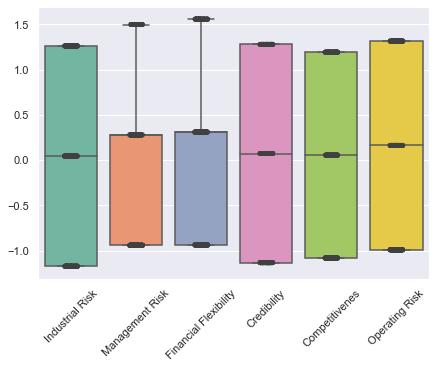

In [75]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

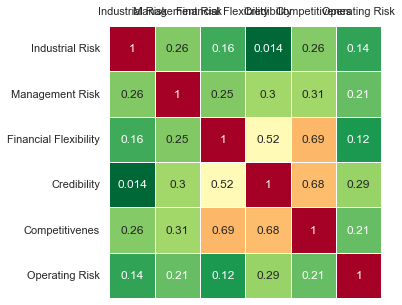

In [76]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [77]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [78]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,1.333076,-1.859234,0.419236,0.287575,-0.352922
1,-0.612655,1.687348,-0.341864,-0.044899,-0.086661
2,0.360211,-0.085943,0.038686,0.121338,-0.219792
3,3.148589,-0.937153,0.155880,0.029603,-0.309468
4,1.202859,2.609429,-0.605219,-0.302871,-0.043207
...,...,...,...,...,...
245,-1.825078,1.109245,-0.411039,0.068181,-0.999398
246,-1.903327,-0.952336,-1.216477,-0.727038,0.394602
247,-2.165747,-0.093534,-0.647493,-0.256982,0.132243
248,-2.428168,0.765267,-0.078508,0.213073,-0.130116


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (43.6% expl.var)', ylabel='PC2 (18.1% expl.var)'>)

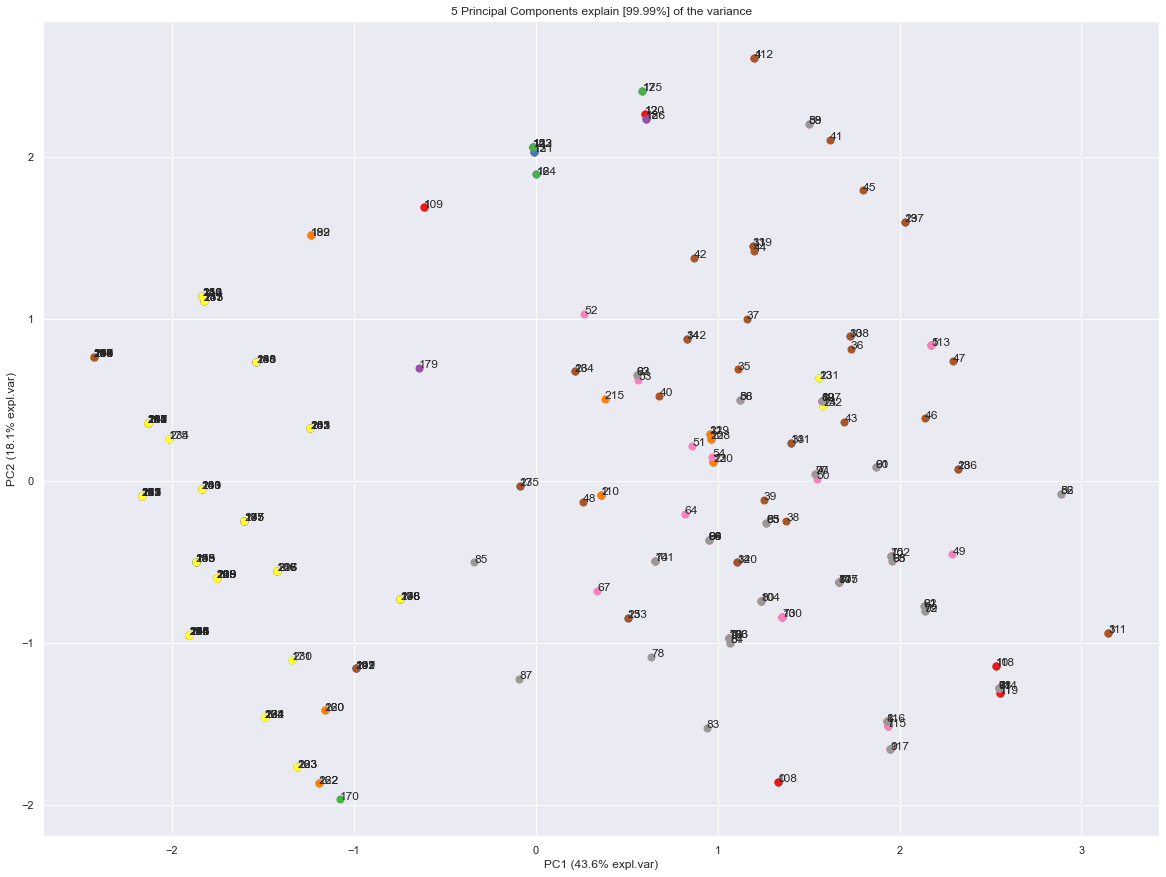

In [79]:
model.scatter(label=True, legend=False)

Eigenvectors

In [80]:
A = out['loadings'].T

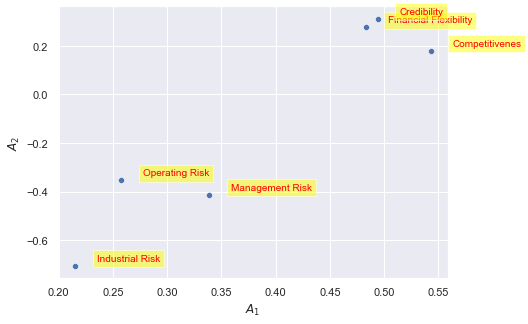

In [81]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

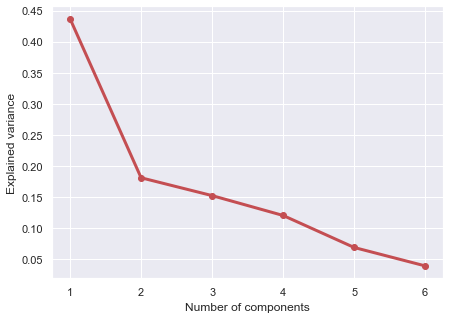

In [82]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

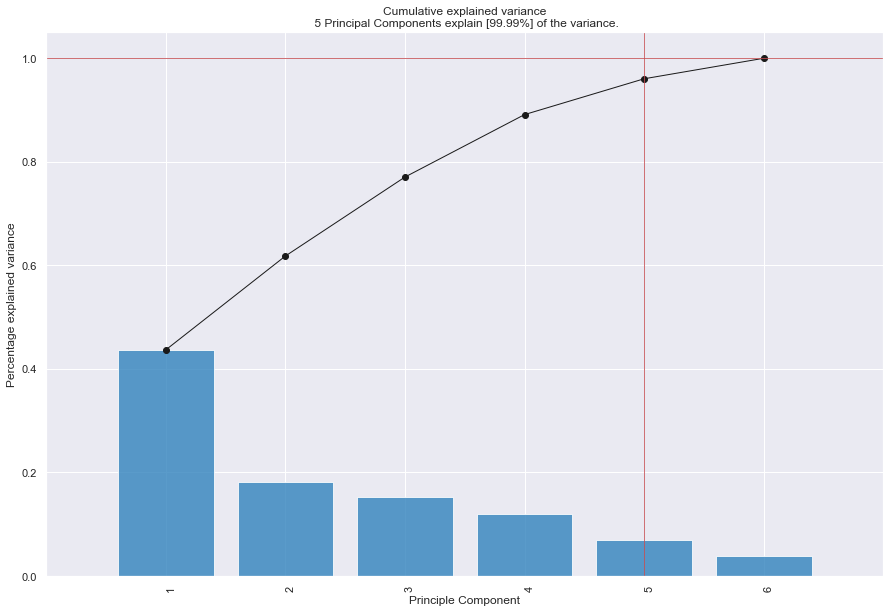

<Figure size 504x360 with 0 Axes>

In [83]:
model.plot();